###Рубежка 1 по биометрии
Шпинева Полина Р3222

In [ ]:
!wget https://data.gov.ru/sites/default/files/obespechennost_vrachami_na_10000_chelovek_chelovek_permstat_7_dekabrya_2013_0.csv

--2022-04-23 10:50:52--  https://data.gov.ru/sites/default/files/obespechennost_vrachami_na_10000_chelovek_chelovek_permstat_7_dekabrya_2013_0.csv
Resolving data.gov.ru (data.gov.ru)... 46.61.230.118
Connecting to data.gov.ru (data.gov.ru)|46.61.230.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48032 (47K) [text/csv]
Saving to: ‘obespechennost_vrachami_na_10000_chelovek_chelovek_permstat_7_dekabrya_2013_0.csv.1’

obespechennost_vrac 100%[===================>]  46.91K  --.-KB/s    in 0.04s   

2022-04-23 10:50:52 (1.13 MB/s) - ‘obespechennost_vrachami_na_10000_chelovek_chelovek_permstat_7_dekabrya_2013_0.csv.1’ saved [48032/48032]



In [ ]:
import pandas as pd
import numpy as np

Считываю данные и вывожу первые 10 элементов

In [ ]:
df = pd.read_csv('obespechennost_vrachami_na_10000_chelovek_chelovek_permstat_7_dekabrya_2013_0.csv', encoding='cp1251', sep=';')
df.head(10)

Уровень календаря        Дата                Статистические показатели  \
0                  1  01.01.2000  Обеспеченность врачами на 10000 человек   
1                  1  01.01.2000  Обеспеченность врачами на 10000 человек   
2                  1  01.01.2000  Обеспеченность врачами на 10000 человек   
3                  1  01.01.2000  Обеспеченность врачами на 10000 человек   
4                  1  01.01.2000  Обеспеченность врачами на 10000 человек   
5                  1  01.01.2000  Обеспеченность врачами на 10000 человек   
6                  1  01.01.2000  Обеспеченность врачами на 10000 человек   
7                  1  01.01.2000  Обеспеченность врачами на 10000 человек   
8                  1  01.01.2000  Обеспеченность врачами на 10000 человек   
9                  1  01.01.2000  Обеспеченность врачами на 10000 человек   

                ОКАТО Значение  
0       Пермский край    55,00  
1      Гайнский район    17,60  
2     Косинский район    36,60  
3     Кочевский район    15,80  
4  Кудымкарский район     9,20  
5     Юрлинский район    14,80  
6    Юсьвинский район    19,40  
7         г. Кудымкар    60,80  
8    Бардымский район    21,10  
9   Березовский район    21,00

Перевожу данные в столбце "Значение" в верный формат

In [ ]:
df['Значение'] = [float(str(x).replace(',', '.')) for x in df['Значение']]

Вывожу значения и уровни календаря для элеметов с данными индексами

In [ ]:
idxs = [1, 10, 100, 200, 500]
df[df.index.isin([x-1 for x in idxs])][['Значение', 'Уровень календаря']]

Значение  Уровень календаря
0        55.0                  1
9        21.0                  1
99       16.4                  1
199      70.7                  1
499      30.7                  1

Перевожу столбец дата в datetime формат для нахождения минимума и максимума столбца

In [ ]:
df['Дата'] = pd.to_datetime(df['Дата'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Уровень календаря          626 non-null    int64         
 1   Дата                       626 non-null    datetime64[ns]
 2   Статистические показатели  626 non-null    object        
 3   ОКАТО                      624 non-null    object        
 4   Значение                   626 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ KB


Вывожу минимум и максимум столбцов, где это возможно

In [ ]:
#df.describe().loc[['min','max']]

for col in df:
  if df.dtypes[col] == object:
    print(col, ' - Категориальное значение')
  else:
    print(col,': ', 'min: ', df[col].min(),', max: ',df[col].max())
    

Уровень календаря :  min:  1 , max:  1
Дата :  min:  2000-01-01 00:00:00 , max:  2012-01-01 00:00:00
Статистические показатели  - Категориальное значение
ОКАТО  - Категориальное значение
Значение :  min:  0.0 , max:  94.5


Создаю новый датафрейм со значениями большими 70, сортирую по столбцу ОКАТО

In [ ]:
dff = df[df['Значение']>70]
dff = dff.sort_values(by='ОКАТО', ascending=False)
dff

Уровень календаря        Дата                Статистические показатели  \
36                   1  01.01.2000  Обеспеченность врачами на 10000 человек   
84                   1  01.01.2001  Обеспеченность врачами на 10000 человек   
132                  1  01.01.2002  Обеспеченность врачами на 10000 человек   
180                  1  01.01.2003  Обеспеченность врачами на 10000 человек   
228                  1  01.01.2004  Обеспеченность врачами на 10000 человек   
277                  1  01.01.2005  Обеспеченность врачами на 10000 человек   
326                  1  01.01.2006  Обеспеченность врачами на 10000 человек   
374                  1  01.01.2007  Обеспеченность врачами на 10000 человек   
422                  1  01.01.2008  Обеспеченность врачами на 10000 человек   
470                  1  01.01.2009  Обеспеченность врачами на 10000 человек   
518                  1  01.01.2010  Обеспеченность врачами на 10000 человек   
566                  1  01.01.2011  Обеспеченность врачами на 10000 человек   
614                  1  01.01.2012  Обеспеченность врачами на 10000 человек   
199                  1  01.01.2004  Обеспеченность врачами на 10000 человек   
345                  1  01.01.2007  Обеспеченность врачами на 10000 человек   

           ОКАТО  Значение  
36      г. Пермь      94.5  
84      г. Пермь      91.9  
132     г. Пермь      90.0  
180     г. Пермь      90.2  
228     г. Пермь      90.1  
277     г. Пермь      91.5  
326     г. Пермь      91.4  
374     г. Пермь      92.1  
422     г. Пермь      89.7  
470     г. Пермь      94.0  
518     г. Пермь      91.5  
566     г. Пермь      92.4  
614     г. Пермь      80.4  
199  г. Кудымкар      70.7  
345  г. Кудымкар      74.3

Вывожу set из уникальных значений столбца ОКАТО

In [ ]:
set(dff['ОКАТО'])


{'г. Кудымкар', 'г. Пермь'}

Считаю количество элементов со значениями из данного диапазона [89;100]

In [ ]:
dff.query('Значение >= 89 and Значение <= 100').value_counts().sum()

12

Считаю количество значений равных 70

In [ ]:
dff[dff['Значение'] == 70].value_counts().sum()

0

Считаю количество значений не равных 90

In [ ]:
dff[dff['Значение'] != 90].value_counts().sum()

14

Создаю и применяю лямбда функцию, проверяющую на неравенство значения числу 90

In [ ]:
ineq_f = lambda x: x != 90
ineq_f(dff['Значение'])

36      True
84      True
132    False
180     True
228     True
277     True
326     True
374     True
422     True
470     True
518     True
566     True
614     True
199     True
345     True
Name: Значение, dtype: bool

In [ ]:
df['ОКАТО'].unique()

array(['Пермский край', 'Гайнский район', 'Косинский район',
       'Кочевский район', 'Кудымкарский район', 'Юрлинский район',
       'Юсьвинский район', 'г. Кудымкар', 'Бардымский район',
       'Березовский район', 'Большесосновский район',
       'Верещагинский район', 'Горнозаводский район', 'Еловский район',
       'Ильинский район', 'Карагайский район', 'Кишертский район',
       'Красновишерский район', 'Куединский район', 'Кунгурский район',
       'Нытвенский район', 'Октябрьский район', 'Ординский район',
       'Осинский район', 'Оханский район', 'Очерский район',
       'Пермский район', 'Сивинский район', 'Соликамский район',
       'Суксунский район', 'Уинский район', 'Усольский район',
       'Частинский район', 'Чердынский район', 'Чернушинский район',
       'Чусовской район', 'г. Пермь', 'Александровский район',
       'г. Березники', 'Гремячинский район', 'Губахинский район',
       'Добрянский район', 'Кизеловский район', 'Краснокамский район',
       'г. Кунгур', 

Выбираю два города - Кунгур и Соликамск

In [ ]:
city_df = df.query('ОКАТО == "г. Кунгур" or ОКАТО == "г. Соликамск"')
city_df

Уровень календаря       Дата                Статистические показатели  \
44                   1 2000-01-01  Обеспеченность врачами на 10000 человек   
46                   1 2000-01-01  Обеспеченность врачами на 10000 человек   
92                   1 2001-01-01  Обеспеченность врачами на 10000 человек   
94                   1 2001-01-01  Обеспеченность врачами на 10000 человек   
140                  1 2002-01-01  Обеспеченность врачами на 10000 человек   
142                  1 2002-01-01  Обеспеченность врачами на 10000 человек   
188                  1 2003-01-01  Обеспеченность врачами на 10000 человек   
190                  1 2003-01-01  Обеспеченность врачами на 10000 человек   
236                  1 2004-01-01  Обеспеченность врачами на 10000 человек   
238                  1 2004-01-01  Обеспеченность врачами на 10000 человек   
285                  1 2005-01-01  Обеспеченность врачами на 10000 человек   
287                  1 2005-01-01  Обеспеченность врачами на 10000 человек   
334                  1 2006-01-01  Обеспеченность врачами на 10000 человек   
336                  1 2006-01-01  Обеспеченность врачами на 10000 человек   
382                  1 2007-01-01  Обеспеченность врачами на 10000 человек   
384                  1 2007-01-01  Обеспеченность врачами на 10000 человек   
430                  1 2008-01-01  Обеспеченность врачами на 10000 человек   
432                  1 2008-01-01  Обеспеченность врачами на 10000 человек   
478                  1 2009-01-01  Обеспеченность врачами на 10000 человек   
480                  1 2009-01-01  Обеспеченность врачами на 10000 человек   
526                  1 2010-01-01  Обеспеченность врачами на 10000 человек   
528                  1 2010-01-01  Обеспеченность врачами на 10000 человек   
574                  1 2011-01-01  Обеспеченность врачами на 10000 человек   
576                  1 2011-01-01  Обеспеченность врачами на 10000 человек   
622                  1 2012-01-01  Обеспеченность врачами на 10000 человек   
624                  1 2012-01-01  Обеспеченность врачами на 10000 человек   

            ОКАТО  Значение  
44      г. Кунгур      44.6  
46   г. Соликамск      44.0  
92      г. Кунгур      43.1  
94   г. Соликамск      43.5  
140     г. Кунгур      48.0  
142  г. Соликамск      44.0  
188     г. Кунгур      43.0  
190  г. Соликамск      42.1  
236     г. Кунгур      44.7  
238  г. Соликамск      42.4  
285     г. Кунгур      44.0  
287  г. Соликамск      38.5  
334     г. Кунгур      41.1  
336  г. Соликамск      39.5  
382     г. Кунгур      41.6  
384  г. Соликамск      39.6  
430     г. Кунгур      40.7  
432  г. Соликамск      39.1  
478     г. Кунгур      39.9  
480  г. Соликамск      36.9  
526     г. Кунгур      37.8  
528  г. Соликамск      34.9  
574     г. Кунгур      37.2  
576  г. Соликамск      31.7  
622     г. Кунгур      34.4  
624  г. Соликамск      30.3

Не перевожу стобец "Дата" в формат datetime, так как сделала это преобразование ранее

In [ ]:
city_df.dtypes

Уровень календаря                     int64
Дата                         datetime64[ns]
Статистические показатели            object
ОКАТО                                object
Значение                            float64
dtype: object

Удаляю лишний столбец с текстом 'Обеспеченность врачами на 10000 человек', его название посмотрела в датафрейме выше

In [ ]:
city_df = city_df.drop(['Статистические показатели'], axis=1)
city_df

Уровень календаря       Дата         ОКАТО  Значение
44                   1 2000-01-01     г. Кунгур      44.6
46                   1 2000-01-01  г. Соликамск      44.0
92                   1 2001-01-01     г. Кунгур      43.1
94                   1 2001-01-01  г. Соликамск      43.5
140                  1 2002-01-01     г. Кунгур      48.0
142                  1 2002-01-01  г. Соликамск      44.0
188                  1 2003-01-01     г. Кунгур      43.0
190                  1 2003-01-01  г. Соликамск      42.1
236                  1 2004-01-01     г. Кунгур      44.7
238                  1 2004-01-01  г. Соликамск      42.4
285                  1 2005-01-01     г. Кунгур      44.0
287                  1 2005-01-01  г. Соликамск      38.5
334                  1 2006-01-01     г. Кунгур      41.1
336                  1 2006-01-01  г. Соликамск      39.5
382                  1 2007-01-01     г. Кунгур      41.6
384                  1 2007-01-01  г. Соликамск      39.6
430                  1 2008-01-01     г. Кунгур      40.7
432                  1 2008-01-01  г. Соликамск      39.1
478                  1 2009-01-01     г. Кунгур      39.9
480                  1 2009-01-01  г. Соликамск      36.9
526                  1 2010-01-01     г. Кунгур      37.8
528                  1 2010-01-01  г. Соликамск      34.9
574                  1 2011-01-01     г. Кунгур      37.2
576                  1 2011-01-01  г. Соликамск      31.7
622                  1 2012-01-01     г. Кунгур      34.4
624                  1 2012-01-01  г. Соликамск      30.3

Удаляю столбец ОКАТО

In [ ]:
city_df.drop(['ОКАТО'], axis=1)


Уровень календаря       Дата  Значение
44                   1 2000-01-01      44.6
46                   1 2000-01-01      44.0
92                   1 2001-01-01      43.1
94                   1 2001-01-01      43.5
140                  1 2002-01-01      48.0
142                  1 2002-01-01      44.0
188                  1 2003-01-01      43.0
190                  1 2003-01-01      42.1
236                  1 2004-01-01      44.7
238                  1 2004-01-01      42.4
285                  1 2005-01-01      44.0
287                  1 2005-01-01      38.5
334                  1 2006-01-01      41.1
336                  1 2006-01-01      39.5
382                  1 2007-01-01      41.6
384                  1 2007-01-01      39.6
430                  1 2008-01-01      40.7
432                  1 2008-01-01      39.1
478                  1 2009-01-01      39.9
480                  1 2009-01-01      36.9
526                  1 2010-01-01      37.8
528                  1 2010-01-01      34.9
574                  1 2011-01-01      37.2
576                  1 2011-01-01      31.7
622                  1 2012-01-01      34.4
624                  1 2012-01-01      30.3

Задаю числовой целый формат столбцу "Значение"

In [ ]:
city_df.Значение = city_df.Значение.astype(int)
city_df

Уровень календаря       Дата         ОКАТО  Значение
44                   1 2000-01-01     г. Кунгур        44
46                   1 2000-01-01  г. Соликамск        44
92                   1 2001-01-01     г. Кунгур        43
94                   1 2001-01-01  г. Соликамск        43
140                  1 2002-01-01     г. Кунгур        48
142                  1 2002-01-01  г. Соликамск        44
188                  1 2003-01-01     г. Кунгур        43
190                  1 2003-01-01  г. Соликамск        42
236                  1 2004-01-01     г. Кунгур        44
238                  1 2004-01-01  г. Соликамск        42
285                  1 2005-01-01     г. Кунгур        44
287                  1 2005-01-01  г. Соликамск        38
334                  1 2006-01-01     г. Кунгур        41
336                  1 2006-01-01  г. Соликамск        39
382                  1 2007-01-01     г. Кунгур        41
384                  1 2007-01-01  г. Соликамск        39
430                  1 2008-01-01     г. Кунгур        40
432                  1 2008-01-01  г. Соликамск        39
478                  1 2009-01-01     г. Кунгур        39
480                  1 2009-01-01  г. Соликамск        36
526                  1 2010-01-01     г. Кунгур        37
528                  1 2010-01-01  г. Соликамск        34
574                  1 2011-01-01     г. Кунгур        37
576                  1 2011-01-01  г. Соликамск        31
622                  1 2012-01-01     г. Кунгур        34
624                  1 2012-01-01  г. Соликамск        30

In [ ]:
city_df.dtypes

Уровень календаря             int64
Дата                 datetime64[ns]
Значение                      int64
dtype: object

Сортирую по городам 

In [ ]:
city_df.sort_values('ОКАТО')

Уровень календаря       Дата         ОКАТО  Значение
44                   1 2000-01-01     г. Кунгур        44
574                  1 2011-01-01     г. Кунгур        37
526                  1 2010-01-01     г. Кунгур        37
478                  1 2009-01-01     г. Кунгур        39
430                  1 2008-01-01     г. Кунгур        40
382                  1 2007-01-01     г. Кунгур        41
622                  1 2012-01-01     г. Кунгур        34
285                  1 2005-01-01     г. Кунгур        44
334                  1 2006-01-01     г. Кунгур        41
188                  1 2003-01-01     г. Кунгур        43
92                   1 2001-01-01     г. Кунгур        43
140                  1 2002-01-01     г. Кунгур        48
236                  1 2004-01-01     г. Кунгур        44
238                  1 2004-01-01  г. Соликамск        42
576                  1 2011-01-01  г. Соликамск        31
46                   1 2000-01-01  г. Соликамск        44
528                  1 2010-01-01  г. Соликамск        34
480                  1 2009-01-01  г. Соликамск        36
432                  1 2008-01-01  г. Соликамск        39
384                  1 2007-01-01  г. Соликамск        39
142                  1 2002-01-01  г. Соликамск        44
336                  1 2006-01-01  г. Соликамск        39
287                  1 2005-01-01  г. Соликамск        38
190                  1 2003-01-01  г. Соликамск        42
94                   1 2001-01-01  г. Соликамск        43
624                  1 2012-01-01  г. Соликамск        30

Считаю по городам средние и медианные значения

In [ ]:
display(round(city_df.groupby('ОКАТО').mean()))
display(city_df.groupby('ОКАТО').median())

Уровень календаря  Значение
ОКАТО                                    
г. Кунгур                   1.0      41.0
г. Соликамск                1.0      39.0

Уровень календаря  Значение
ОКАТО                                    
г. Кунгур                   1.0      41.0
г. Соликамск                1.0      39.0

Вывожу графики

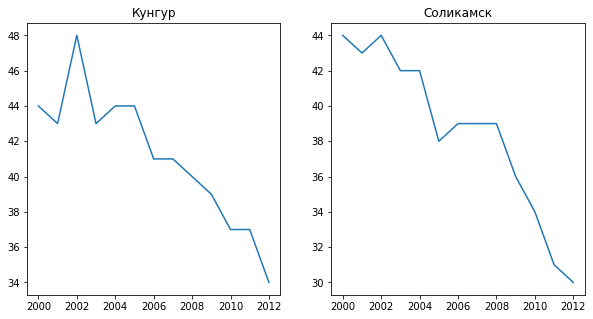

In [ ]:
import matplotlib.pyplot as plt

kungur = city_df[city_df['ОКАТО']=='г. Кунгур']
solik = city_df[city_df['ОКАТО']!='г. Кунгур']

plt.figure(figsize = (10, 5))

for plot_number, plot in enumerate([kungur, solik]):
    plt.subplot(1, 2, plot_number + 1)
    plt.plot(plot['Дата'], plot['Значение'])
    plt.title(np.where(plot_number==0, 'Кунгур', 'Соликамск'))